# Create the dataset required for SLICE

## Unpack the polygons for France data

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon, MultiPolygon

print("start reading file")
path_gpkg = "france/PARCELLES_GRAPHIQUES.gpkg"

# Load the data
data_x = gpd.read_file(path_gpkg)
print("done")

start reading file
done


In [82]:
print(data_x.at[0,'geometry'])

MULTIPOLYGON (((-5.126391455074792 48.45325586848624, -5.126460282829159 48.45325518624526, -5.126539133326716 48.45329292658321, -5.126592241479859 48.45336075795034, -5.126620306251549 48.4534370522314, -5.126563996132913 48.45345305806643, -5.126368214894008 48.45351101725135, -5.12636359882645 48.45367722296991, -5.126518623432457 48.45394440359299, -5.126559820813447 48.4540791384615, -5.126253624249629 48.45417030571623, -5.126253624527506 48.45417030750595, -5.126356488718499 48.45444106981923, -5.125430173571918 48.45461259735622, -5.125242095286578 48.45431532011915, -5.125181277812317 48.45410640474698, -5.124975603724774 48.4539047424401, -5.125102652041116 48.45378272680743, -5.125269049074023 48.45366610073027, -5.12533578915328 48.4536911862768, -5.125604475678892 48.45359281591248, -5.125513002456209 48.45352661029913, -5.126063480327508 48.45332425564639, -5.126391455074792 48.45325586848624)))
The history saving thread hit an unexpected error (OperationalError('unable 

In [3]:
type(data_x)

geopandas.geodataframe.GeoDataFrame

In [4]:
print(data_x.at[0,'geometry'])

MULTIPOLYGON (((100181.4693000019 6847890.5077, 100176.3991999999 6847890.9551, 100171.0306999981 6847895.727000002, 100167.8991999999 6847903.6305, 100166.7063000053 6847912.2795, 100171.0306999981 6847913.6215, 100186.0923000053 6847918.542800002, 100188.3298000023 6847936.885000002, 100179.9789000005 6847967.604600001, 100178.4875000045 6847982.815100003, 100202.0491000041 6847990.569500003, 100202.0491000041 6847990.569700003, 100197.575500004 6848021.289100002, 100267.6634000018 6848033.218900003, 100278.1019999981 6847998.920600001, 100280.1897 6847975.359000001, 100293.0144000053 6847951.499200001, 100282.2769000009 6847938.972900003, 100268.7067999989 6847927.341400001, 100264.0844999999 6847930.622000001, 100243.1994000003 6847921.786000002, 100249.1713000014 6847913.7709, 100206.3729000017 6847895.5779, 100181.4693000019 6847890.5077)))


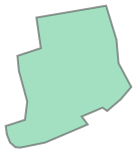

In [5]:
data_x.iat[0,6]

In [6]:
data_x.shape

(9855653, 7)

In [7]:
data_x['geometry']

0          MULTIPOLYGON (((100181.469 6847890.508, 100176...
1          MULTIPOLYGON (((100430.506 6848037.096, 100420...
2          MULTIPOLYGON (((100775.878 6848114.342, 100858...
3          MULTIPOLYGON (((101137.056 6848143.571, 101343...
4          MULTIPOLYGON (((101564.093 6846500.747, 101610...
                                 ...                        
9855648    MULTIPOLYGON (((208432.875 6777272.884, 208432...
9855649    MULTIPOLYGON (((698301.135 7016957.293, 698301...
9855650    MULTIPOLYGON (((798892.229 6299478.052, 798892...
9855651    MULTIPOLYGON (((834389.874 6356029.494, 834384...
9855652    MULTIPOLYGON (((869229.848 6531875.330, 869229...
Name: geometry, Length: 9855653, dtype: geometry

## Sample Polygons to create the dataset

### Choice 1: Randomly sample points from the data
**Warning**: This method will require almost the whole france planet mosiacs which could end up in TBs

In [8]:
from shapely.geometry import MultiPolygon
multipolygon = data_x.at[0,'geometry']
type(multipolygon)
# Iterate over the points in the MultiPolygon
# print( multipolygon.coords)
# Iterate over each polygon in the MultiPolygon
for polygon in multipolygon.geoms:
    # Iterate over the points in the exterior ring of each polygon
    for point in polygon.exterior.coords:
        lon, lat = point
        print(f"Longitude: {lon}, Latitude: {lat}")

Longitude: 100181.46930000186, Latitude: 6847890.5077
Longitude: 100176.39919999987, Latitude: 6847890.9551
Longitude: 100171.03069999814, Latitude: 6847895.727000002
Longitude: 100167.89919999987, Latitude: 6847903.6305
Longitude: 100166.70630000532, Latitude: 6847912.2795
Longitude: 100171.03069999814, Latitude: 6847913.6215
Longitude: 100186.09230000526, Latitude: 6847918.542800002
Longitude: 100188.32980000228, Latitude: 6847936.885000002
Longitude: 100179.97890000045, Latitude: 6847967.604600001
Longitude: 100178.48750000447, Latitude: 6847982.815100003
Longitude: 100202.04910000414, Latitude: 6847990.569500003
Longitude: 100202.04910000414, Latitude: 6847990.569700003
Longitude: 100197.575500004, Latitude: 6848021.2891000025
Longitude: 100267.66340000182, Latitude: 6848033.218900003
Longitude: 100278.10199999809, Latitude: 6847998.920600001
Longitude: 100280.18969999999, Latitude: 6847975.359000001
Longitude: 100293.01440000534, Latitude: 6847951.499200001
Longitude: 100282.27690

In [9]:
"""
points = data_x.sample(10000)
"""
import pyproj
# Perform the coordinate transformation
source_crs = 'EPSG:2154'  # Replace XX with the appropriate UTM zone for your location
target_crs = 'EPSG:4326'  # WGS84

transformer = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)

# Define a helper function to transform a single MultiPolygon geometry
# def transform_multipolygon(multipolygon):
#     transformed_polygons = []
#     exterior_ring = []
#     for point in multipolygon:
#         lon, lat = transformer.transform(point[0], point[1])
#         exterior_ring.append((lon, lat))
#     transformed_polygons.append(MultiPolygon([exterior_ring]))
#     return MultiPolygon(transformed_polygons)

# # Apply the coordinate transformation to the MultiPolygon geometry
# data_y = data_x['geometry'].apply(transform_multipolygon)

# # Extract the transformed longitude and latitude coordinates
# longitude_list = gdf.geometry[0][0].exterior.coords.xy[0]
# latitude_list = gdf.geometry[0][0].exterior.coords.xy[1]

data_sample = data_x
data_sample.loc[:,'geometry'] = data_sample.loc[:,'geometry'].apply(lambda mp: MultiPolygon([
    Polygon([transformer.transform(x, y) for x, y in polygon.exterior.coords])
    for polygon in mp.geoms
]))

# print(data_y[0])


# Extract the transformed longitude and latitude coordinates for each polygon
# longitude_list = []
# latitude_list = []
# for polygon in gdf.geometry[0]:
#     for ring in polygon:
#         longitude = ring[0]
#         latitude = ring[1]
#         longitude_list.extend(longitude)
#         latitude_list.extend(latitude)

# Print the result
# for lon, lat in zip(longitude_list, latitude_list):
#     print(f"Longitude: {lon}, Latitude: {lat}")

data_sample

,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,geometry
0,19631101,1.10,PPH,18,,,"MULTIPOLYGON (((-5.126 48.453, -5.126 48.453, ..."
1,19631102,0.28,PPH,18,,,"MULTIPOLYGON (((-5.123 48.455, -5.123 48.455, ..."
2,19631100,6.40,PPH,18,,,"MULTIPOLYGON (((-5.119 48.456, -5.118 48.456, ..."
3,19631099,6.24,PPH,18,,,"MULTIPOLYGON (((-5.114 48.456, -5.111 48.457, ..."
4,19634790,0.99,PPH,18,,,"MULTIPOLYGON (((-5.106 48.442, -5.105 48.442, ..."
...,...,...,...,...,...,...,...
9855648,19672516,2.37,MIE,2,,,"MULTIPOLYGON (((-3.588 47.911, -3.588 47.911, ..."
9855649,20824875,11.30,BTN,24,,,"MULTIPOLYGON (((2.976 50.251, 2.976 50.251, 2...."
9855650,19716275,1.01,VRC,21,,,"MULTIPOLYGON (((4.228 43.787, 4.228 43.787, 4...."
9855651,21357114,3.71,TRN,6,,,"MULTIPOLYGON (((4.684 44.290, 4.684 44.290, 4...."


In [10]:
data_sample

,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,geometry
0,19631101,1.10,PPH,18,,,"MULTIPOLYGON (((-5.126 48.453, -5.126 48.453, ..."
1,19631102,0.28,PPH,18,,,"MULTIPOLYGON (((-5.123 48.455, -5.123 48.455, ..."
2,19631100,6.40,PPH,18,,,"MULTIPOLYGON (((-5.119 48.456, -5.118 48.456, ..."
3,19631099,6.24,PPH,18,,,"MULTIPOLYGON (((-5.114 48.456, -5.111 48.457, ..."
4,19634790,0.99,PPH,18,,,"MULTIPOLYGON (((-5.106 48.442, -5.105 48.442, ..."
...,...,...,...,...,...,...,...
9855648,19672516,2.37,MIE,2,,,"MULTIPOLYGON (((-3.588 47.911, -3.588 47.911, ..."
9855649,20824875,11.30,BTN,24,,,"MULTIPOLYGON (((2.976 50.251, 2.976 50.251, 2...."
9855650,19716275,1.01,VRC,21,,,"MULTIPOLYGON (((4.228 43.787, 4.228 43.787, 4...."
9855651,21357114,3.71,TRN,6,,,"MULTIPOLYGON (((4.684 44.290, 4.684 44.290, 4...."


### Choice 2: Select points from an ROI that has diverse plots
Randomly select 10000 points from data and save them to data/france/points.gpkg

In [11]:
# ROI of sampled points precise repetability
roi = Polygon([
  [4.645017,44.618415],
  [5.1856,44.618415],
  [5.1856,45.437524000000025],
  [4.645017,45.437524000000025]
])
 
data = data_sample[data_sample.within(roi)]
print('sample length - ', len(data))


sample length -  109170


In [13]:
data

,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,geometry
7715348,14016846,0.01,SNE,28,,,"MULTIPOLYGON (((4.673 44.699, 4.673 44.699, 4...."
7715566,18947391,0.15,RGA,19,,,"MULTIPOLYGON (((4.713 44.717, 4.713 44.717, 4...."
7763493,18947389,0.15,RGA,19,,,"MULTIPOLYGON (((4.713 44.717, 4.713 44.716, 4...."
7764707,18947390,0.63,RGA,19,,,"MULTIPOLYGON (((4.711 44.717, 4.713 44.717, 4...."
7764788,14006695,0.13,PTR,19,,,"MULTIPOLYGON (((4.669 44.776, 4.669 44.777, 4...."
...,...,...,...,...,...,...,...
8331304,4108959,0.02,BTA,28,,,"MULTIPOLYGON (((5.185 45.421, 5.185 45.421, 5...."
8331307,4049665,0.39,PPH,18,,,"MULTIPOLYGON (((5.184 45.426, 5.184 45.426, 5...."
8331308,20048393,0.01,SNE,28,,,"MULTIPOLYGON (((5.184 45.426, 5.184 45.426, 5...."
8331309,4080164,1.60,PPH,18,,,"MULTIPOLYGON (((5.185 45.427, 5.185 45.426, 5...."


In [12]:
data_x

,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,geometry
0,19631101,1.10,PPH,18,,,"MULTIPOLYGON (((-5.126 48.453, -5.126 48.453, ..."
1,19631102,0.28,PPH,18,,,"MULTIPOLYGON (((-5.123 48.455, -5.123 48.455, ..."
2,19631100,6.40,PPH,18,,,"MULTIPOLYGON (((-5.119 48.456, -5.118 48.456, ..."
3,19631099,6.24,PPH,18,,,"MULTIPOLYGON (((-5.114 48.456, -5.111 48.457, ..."
4,19634790,0.99,PPH,18,,,"MULTIPOLYGON (((-5.106 48.442, -5.105 48.442, ..."
...,...,...,...,...,...,...,...
9855648,19672516,2.37,MIE,2,,,"MULTIPOLYGON (((-3.588 47.911, -3.588 47.911, ..."
9855649,20824875,11.30,BTN,24,,,"MULTIPOLYGON (((2.976 50.251, 2.976 50.251, 2...."
9855650,19716275,1.01,VRC,21,,,"MULTIPOLYGON (((4.228 43.787, 4.228 43.787, 4...."
9855651,21357114,3.71,TRN,6,,,"MULTIPOLYGON (((4.684 44.290, 4.684 44.290, 4...."


## Visualize Data

<Axes: >

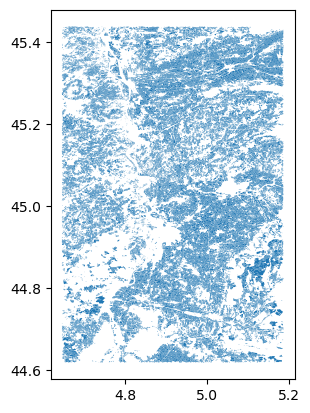

In [14]:
data.plot()

<Axes: >

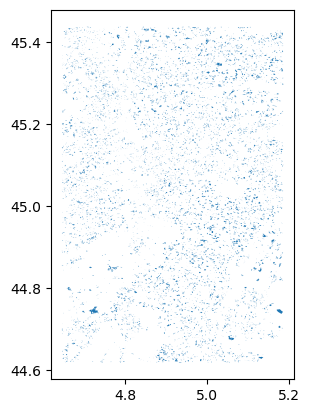

In [15]:
sampled = data.sample(10000)
#Save the sampled points for training and testing
sampled.to_file("france/sampled.gpkg", driver="GPKG")
sampled.plot()

<Axes: >

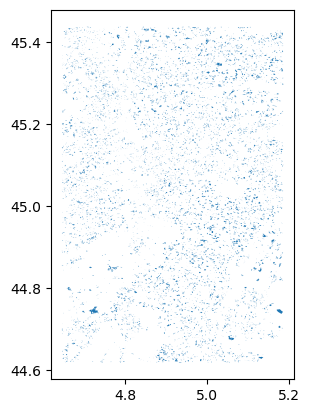

In [16]:
sampled.plot()

## Extract images

In [4]:
import os
import shutil
import cv2
import numpy as np
import geopandas as gpd
import tensorflow as tf
from pyunpack import Archive
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon

# models/parcel_delineation/ParcelDelineation/data/sentinel_tf

# BASE_DIR = "france/"
BASE_DIR = "../models/parcel_delineation/ParcelDelineation/data/"

# path = BASE_DIR + "gz_files/"
# tf_out_path = BASE_DIR + "tf_files/"
path = BASE_DIR + "sentinel_gz/"
tf_out_path = BASE_DIR + "sentinel_tf/"

if os.path.exists(tf_out_path):
    print("Removing Existing Directory.....")
    shutil.rmtree(tf_out_path)

print("Creating TFRECORD Exctract Directory.....")
os.makedirs(tf_out_path)
    
gz_files = os.listdir(path)
gz_files = [f for f in gz_files if f.endswith('.gz')]

for i in gz_files:
    print('archive - ', path+i)
    Archive(path+i).extractall(tf_out_path)

print(">>>>>>>>>> Extraction Complete <<<<<<<<<<<<")
    
# img_out_path = BASE_DIR + "images/"
# if os.path.exists(img_out_path):
#     print("Removing Existing Image Directory.....")
#     shutil.rmtree(img_out_path)

# print("Creating IMAGE Exctract Directory.....")
# os.makedirs(img_out_path)

# tf_files = [tf_out_path + f for f in os.listdir(tf_out_path)]

# print("extracted files : ", len(tf_files))

Removing Existing Directory.....
Creating TFRECORD Exctract Directory.....
archive -  ../models/parcel_delineation/ParcelDelineation/data/sentinel_gz/ps_france_3_21_01_03-00000.tfrecord.gz
archive -  ../models/parcel_delineation/ParcelDelineation/data/sentinel_gz/ps_france_3_21_01_03-00003.tfrecord.gz
archive -  ../models/parcel_delineation/ParcelDelineation/data/sentinel_gz/ps_france_3_21_01_03-00009.tfrecord.gz
archive -  ../models/parcel_delineation/ParcelDelineation/data/sentinel_gz/ps_france_3_21_01_03-00001.tfrecord.gz
archive -  ../models/parcel_delineation/ParcelDelineation/data/sentinel_gz/ps_france_3_21_01_03-00008.tfrecord.gz
archive -  ../models/parcel_delineation/ParcelDelineation/data/sentinel_gz/ps_france_3_21_01_03-00006.tfrecord.gz
archive -  ../models/parcel_delineation/ParcelDelineation/data/sentinel_gz/ps_france_3_21_01_03-00002.tfrecord.gz
archive -  ../models/parcel_delineation/ParcelDelineation/data/sentinel_gz/ps_france_3_21_01_03-00007.tfrecord.gz
archive -  ..

In [100]:
# Create a new geo dataframe
df = gpd.GeoDataFrame()
df['parcel_id'] = None
df['geometry'] = None

options = tf.compat.v1.python_io.TFRecordOptions(tf.compat.v1.python_io.TFRecordCompressionType.NONE)
idx = 0
satellite_features = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8','B8A', 'B11', 'B12' ]
# satellite_features = ['B4', 'B3', 'B2','B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12' ]


print("start processing")
for tf_file in tf_files:
    print("Processing File: ", tf_file)
    for example in tf.compat.v1.python_io.tf_record_iterator(tf_file, options=options):
        ex = tf.train.Example.FromString(example)
        min_lon = min(ex.features.feature['longitude'].float_list.value) 
        max_lon = max(ex.features.feature['longitude'].float_list.value) 
        min_lat = min(ex.features.feature['latitude'].float_list.value) 
        max_lat = max(ex.features.feature['latitude'].float_list.value)

        # If any of the coordinates are zero take the second min/max
        if min_lon == 0:
            min_lon = list(set(sorted(ex.features.feature['longitude'].float_list.value)))[1]
        if max_lon == 0:
            max_lon = list(set(sorted(ex.features.feature['longitude'].float_list.value)))[-2]
        if min_lat == 0:
            min_lat = list(set(sorted(ex.features.feature['latitude'].float_list.value)))[1]
        if max_lat == 0:
            max_lat = list(set(sorted(ex.features.feature['latitude'].float_list.value)))[-2]


        geometry = Polygon([
            [min_lon, min_lat],
            [min_lon, max_lat],
            [max_lon, max_lat],
            [max_lon, min_lat]
        ])

        # Calculate the area
        # if geometry.area > 1:
        #     continue


        features = []
        for satellite_feature in satellite_features:
            feature = (ex.features.feature[satellite_feature].float_list.value)
            feature = np.array(feature)
            feature = feature.reshape((128, 128, 1))
            # feature = np.flip(feature, axis=0)
            features.append(feature)
            
        image = np.concatenate(features, axis=2)
        # image = image/np.max(image) # Normalization
        # But using 2188 has more clarity
        # image = image/2188

        # Save the image
        image_name = img_out_path + str(idx)
        np.save(image_name+'.npy', image)
        
        # bgr_img = image[:, :, :3]
        # Normalize the band values to the range [0, 1]
        # normalized_img = (bgr_img - bgr_img.min()) / (bgr_img.max() - bgr_img.min())
        # normalized_img = (normalized_img * 255).astype(np.uint8)
        # rgb_img = cv2.cvtColor(normalized_img, cv2.COLOR_BGR2RGB)
        # print('rgb_image ')
        
        # cv2.imwrite(image_name + "x.png", rgb_image)
        rgb_img = image[:, :, :3]/2188
        cv2.imwrite(image_name + ".png", rgb_img*255)
        
        # Split the channels
        # channels = cv2.split(image)
        # Save each channel as a separate image
        # for i, channel in enumerate(channels):
        #     cv2.imwrite(image_name, channel)

        # Save the geo data
        df.loc[idx, 'parcel_id'] = str(idx)
        df.loc[idx, 'geometry'] = geometry
        
        idx += 1
        # break
    # break

print('done')
# df.to_file(img_out_path + "geo_data.geojson", driver="GeoJSON")

start processing
Processing File:  france/tf_files/ps_france_3_21_01_12-00024.tfrecord
Processing File:  france/tf_files/ps_france_3_21_01_12-00021.tfrecord
Processing File:  france/tf_files/ps_france_3_21_01_12-00015.tfrecord
Processing File:  france/tf_files/ps_france_3_21_01_12-00022.tfrecord
Processing File:  france/tf_files/ps_france_3_21_01_12-00005.tfrecord
Processing File:  france/tf_files/ps_france_3_21_01_12-00004.tfrecord
Processing File:  france/tf_files/ps_france_3_21_01_12-00016.tfrecord
Processing File:  france/tf_files/ps_france_3_21_01_12-00009.tfrecord
Processing File:  france/tf_files/ps_france_3_21_01_12-00006.tfrecord
Processing File:  france/tf_files/ps_france_3_21_01_12-00011.tfrecord
Processing File:  france/tf_files/ps_france_3_21_01_12-00013.tfrecord
Processing File:  france/tf_files/ps_france_3_21_01_12-00020.tfrecord
Processing File:  france/tf_files/ps_france_3_21_01_12-00012.tfrecord
Processing File:  france/tf_files/ps_france_3_21_01_12-00002.tfrecord
Pro

In [101]:
df.to_file(img_out_path + "parcel_data.geojson", driver="GeoJSON")
df

,parcel_id,geometry
0,0,"POLYGON ((5.13949 44.65602, 5.13949 44.66742, ..."
1,1,"POLYGON ((5.15098 44.65602, 5.15098 44.66742, ..."
2,2,"POLYGON ((5.16248 44.65602, 5.16248 44.66742, ..."
3,3,"POLYGON ((5.17398 44.65602, 5.17398 44.66742, ..."
4,4,"POLYGON ((4.64990 44.65126, 4.64990 44.65593, ..."
...,...,...
3332,3332,"POLYGON ((5.03600 45.40342, 5.03600 45.41482, ..."
3333,3333,"POLYGON ((5.04750 45.40342, 5.04750 45.41482, ..."
3334,3334,"POLYGON ((5.05900 45.40342, 5.05900 45.41482, ..."
3335,3335,"POLYGON ((5.07050 45.40342, 5.07050 45.41482, ..."


In [102]:
# roi = Polygon([
#             [-0.7155534667066932, 43.39057963239615],
#             [-0.7155534667066932, 43.156608691390645],
#             [0.34359722909410806, 43.156608691390645],
#             [0.34359722909410806, 43.39057963239615]
# ])

# path_gpkg = "france/refined.gpkg"

# # Load the data
# data = gpd.read_file(path_gpkg)
# data = data[data.within(roi)]

data

,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,geometry,centroid
7715348,14016846,0.01,SNE,28,,,"MULTIPOLYGON (((4.673 44.699, 4.673 44.699, 4....",POINT (4.673 44.698)
7715566,18947391,0.15,RGA,19,,,"MULTIPOLYGON (((4.713 44.717, 4.713 44.717, 4....",POINT (4.712 44.717)
7763493,18947389,0.15,RGA,19,,,"MULTIPOLYGON (((4.713 44.717, 4.713 44.716, 4....",POINT (4.712 44.716)
7764707,18947390,0.63,RGA,19,,,"MULTIPOLYGON (((4.711 44.717, 4.713 44.717, 4....",POINT (4.712 44.717)
7764788,14006695,0.13,PTR,19,,,"MULTIPOLYGON (((4.669 44.776, 4.669 44.777, 4....",POINT (4.669 44.776)
...,...,...,...,...,...,...,...,...
8331304,4108959,0.02,BTA,28,,,"MULTIPOLYGON (((5.185 45.421, 5.185 45.421, 5....",POINT (5.185 45.421)
8331307,4049665,0.39,PPH,18,,,"MULTIPOLYGON (((5.184 45.426, 5.184 45.426, 5....",POINT (5.184 45.427)
8331308,20048393,0.01,SNE,28,,,"MULTIPOLYGON (((5.184 45.426, 5.184 45.426, 5....",POINT (5.184 45.426)
8331309,4080164,1.60,PPH,18,,,"MULTIPOLYGON (((5.185 45.427, 5.185 45.426, 5....",POINT (5.185 45.427)


In [103]:
def to_polygons(geometries):
    for geometry in geometries:
        if isinstance(geometry, Polygon):
            yield geometry
        else:
            yield from geometry

dfx = df.copy()
import warnings
warnings.filterwarnings('ignore')

In [104]:
# Calculate the centroid of data
data['centroid'] = data['geometry'].centroid
dfx['parcels'] = None

# Iterate over the data
for idx, row in dfx.iterrows():
    if idx % 100 == 0:
        print("Processing: ", idx)
    # Get the centroids that lie inside the row's geometry
    centroids = data[data['centroid'].within(row['geometry'])].copy()
    # Drop all columns except the geometry
    centroids = centroids.drop(columns=['centroid'])
    # save to geojson
    centroids.to_file(img_out_path + row['parcel_id'] + ".geojson", driver="GeoJSON")

print('done')
# dfx

Processing:  0
Processing:  100
Processing:  200
Processing:  300
Processing:  400
Processing:  500
Processing:  600
Processing:  700
Processing:  800
Processing:  900
Processing:  1000
Processing:  1100
Processing:  1200
Processing:  1300
Processing:  1400
Processing:  1500
Processing:  1600
Processing:  1700
Processing:  1800
Processing:  1900
Processing:  2000
Processing:  2100
Processing:  2200
Processing:  2300
Processing:  2400
Processing:  2500
Processing:  2600
Processing:  2700
Processing:  2800
Processing:  2900
Processing:  3000
Processing:  3100
Processing:  3200
Processing:  3300
done


In [68]:
target_out_path = BASE_DIR + "images/target_annotations/"

def draw(img, data_in_dfx, dfx , idx):
    # Get the image of the parcel
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img)

    # Vertical flip the image using cv2
    # img = cv2.flip(img, 0)

    # Get the coordinates of the parcel
    coords = dfx.geometry.exterior.coords.xy

    # Map the lat/lons to the image

    # Get the min/max lat/lon
    min_lon = min(coords[0])
    max_lon = max(coords[0])
    min_lat = min(coords[1])
    max_lat = max(coords[1])

    # Get the width and height of the image
    img_height, img_width, _ = img.shape

    # Get the width and height of the parcel
    width = max_lon - min_lon
    height = max_lat - min_lat

    # Get the pixel width and height
    pixel_width = img_width/width
    pixel_height = img_height/height


    # Draw the multipolygon in the data_in_dfx
    for i in range(len(data_in_dfx)):
        multipolygon = data_in_dfx.iloc[i].geometry.geoms
        for polygon in multipolygon:
            coords = polygon.exterior.coords.xy

            # Get the pixel coords
            pixel_coords = []
            for i in range(len(coords[0])):
                x = coords[0][i]
                y = coords[1][i]

                # Get the pixel x and y
                pixel_x = (x - min_lon) * pixel_width
                pixel_y = (max_lat - y) * pixel_height

                pixel_coords.append([pixel_x, pixel_y])

            # Convert the pixel coords to int
            pixel_coords = np.array(pixel_coords, dtype=np.int32)

            # Draw the polygon
            cv2.polylines(img, [pixel_coords], True, (0, 255, 0), 1)

    # Show the image
    plt.imshow(img)
    # Save the image array to a NumPy file
    np.save(target_out_path + str(idx)+'.npy', img)
    # print(img.shape)
    
    
    # data_in_dfx.plot()

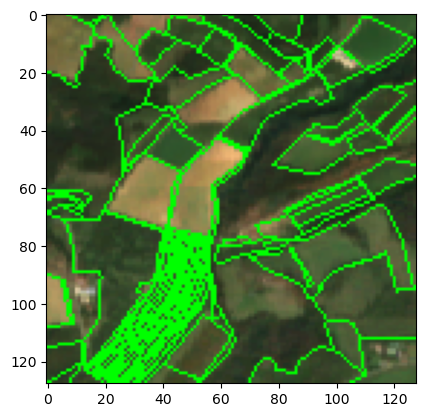

In [71]:
img_out_path = BASE_DIR + "images/"
idx = 1000
dfx = df.iloc[idx]
data_in_dfx = gpd.read_file(img_out_path + str(idx) + ".geojson")
img = cv2.imread(img_out_path + str(idx) + ".png")
#draw boundaries
draw(img, data_in_dfx, dfx, idx)

#05_08

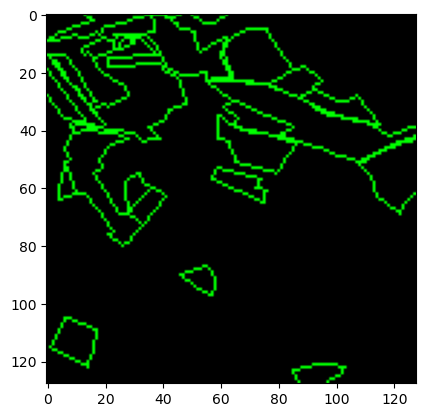

In [141]:
idx = 765
dfx = df.iloc[idx]
data_in_dfx = gpd.read_file(img_out_path + str(idx) + ".geojson")

img = cv2.imread(img_out_path + str(idx) + ".png")

draw_bg(data_in_dfx, dfx, idx)
#09-12

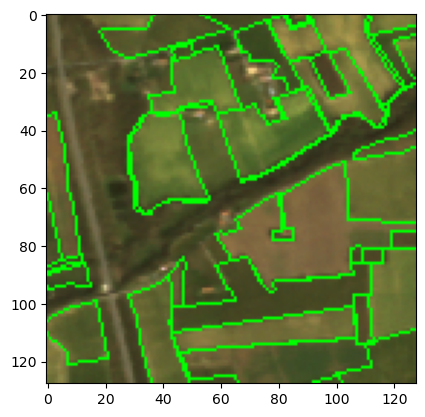

In [131]:
idx = 0
dfx = df.iloc[idx]
data_in_dfx = gpd.read_file(img_out_path + str(idx) + ".geojson")
new_img = np.load(img_out_path + str(idx) + ".npy")
# Extract RGB channels
rgb_img = new_img[:, :, :3]
# Normalize the pixel values to the range of 0-255
rgb_img = (rgb_img * 255).astype(np.uint8)

#save as png
cv2.imwrite(img_out_path + str(idx)+".png", rgb_img)
#read image
img = cv2.imread(img_out_path + str(idx) + ".png")
plt.imshow(img)

#draw boundaries
draw(img, data_in_dfx, dfx, idx)

#remove temporary image
os.remove(img_out_path + str(idx)+".png")
#05_08

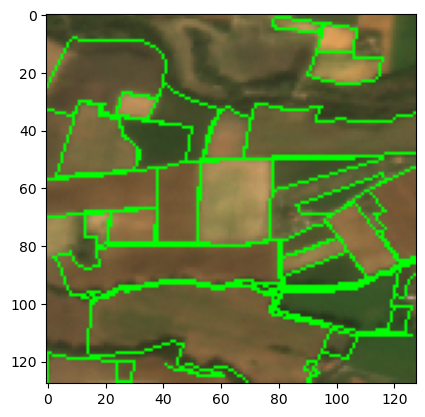

In [80]:
idx = 100
dfx = df.iloc[idx]
data_in_dfx = gpd.read_file(img_out_path + str(idx) + ".geojson")

img = cv2.imread(img_out_path + str(idx) + ".png")

draw(img, data_in_dfx, dfx, idx)
#09_12

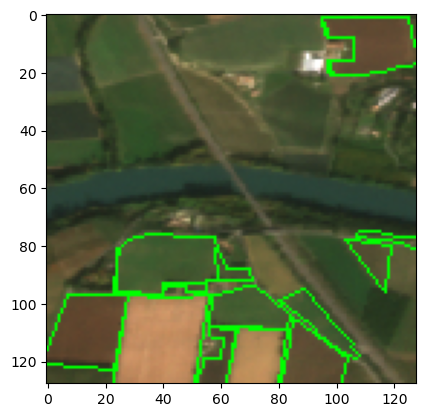

In [100]:
semantic_segmentation_image = np.load(target_out_path+'987.npy')
plt.imshow(semantic_segmentation_image)

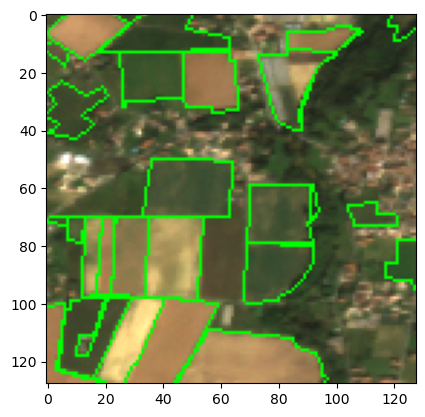

In [84]:
sem_img = np.load(target_out_path+'677.npy')
plt.imshow(sem_img)

In [50]:
ls

combine_patches.ipynb     image.npy        README.md
data.ipynb                metadata_gen.py  semantic_segmentation_image.npy
france/                   metadata.json    tools/
generate_pseudo_masks.sh  panoptic_res/    weights/
get_data.sh               PASTIS/


done


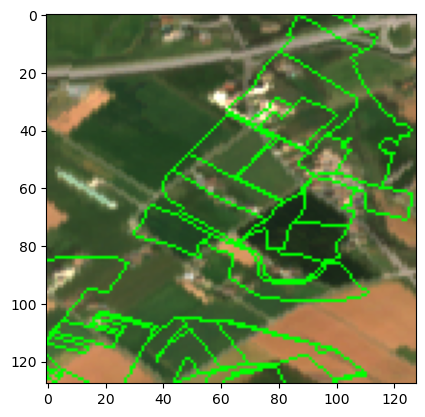

In [31]:
# idx = 0
# dfx = df.iloc[idx]
# data_in_dfx = gpd.read_file(img_out_path + str(idx) + ".geojson")

# img = cv2.imread(img_out_path + str(idx) + ".png")

# draw(img, data_in_dfx, dfx)
# #09-12


for i in range(len(df)):
    dfx = df.iloc[i]
    data_in_dfx = gpd.read_file(img_out_path + str(i) + ".geojson")
    img = cv2.imread(img_out_path + str(idx) + ".png")
    draw(img, data_in_dfx, dfx, i)
print('done')

In [140]:
target_bg_out_path = BASE_DIR + "images/target_annotations_bg/"

def draw_bg(data_in_dfx, dfx , idx):
    # Get the image of the parcel

    img = np.zeros((128, 128, 3), dtype=np.uint8)

    # Get the coordinates of the parcel
    coords = dfx.geometry.exterior.coords.xy

    # Map the lat/lons to the image

    # Get the min/max lat/lon
    min_lon = min(coords[0])
    max_lon = max(coords[0])
    min_lat = min(coords[1])
    max_lat = max(coords[1])

    # Get the width and height of the image
    img_height, img_width, _ = img.shape

    # Get the width and height of the parcel
    width = max_lon - min_lon
    height = max_lat - min_lat

    # Get the pixel width and height
    pixel_width = img_width/width
    pixel_height = img_height/height


    # Draw the multipolygon in the data_in_dfx
    for i in range(len(data_in_dfx)):
        multipolygon = data_in_dfx.iloc[i].geometry.geoms
        for polygon in multipolygon:
            coords = polygon.exterior.coords.xy

            # Get the pixel coords
            pixel_coords = []
            for i in range(len(coords[0])):
                x = coords[0][i]
                y = coords[1][i]

                # Get the pixel x and y
                pixel_x = (x - min_lon) * pixel_width
                pixel_y = (max_lat - y) * pixel_height

                pixel_coords.append([pixel_x, pixel_y])

            # Convert the pixel coords to int
            pixel_coords = np.array(pixel_coords, dtype=np.int32)

            # Draw the polygon
            cv2.polylines(img, [pixel_coords], True, (0, 255, 0), 1)

    # Show the image
    plt.imshow(img)
    # Save the image array to a NumPy file
    np.save(target_bg_out_path + str(idx)+'.npy', img)

done


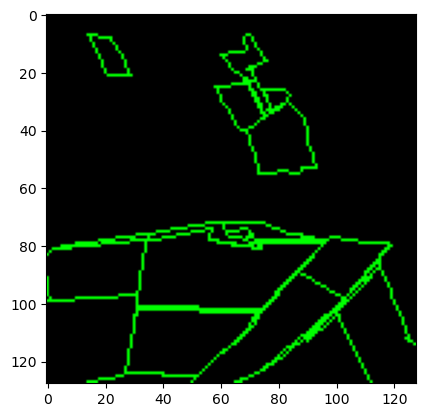

In [88]:
for i in range(len(df)):
    dfx = df.iloc[i]
    data_in_dfx = gpd.read_file(img_out_path + str(i) + ".geojson")
    draw_bg(data_in_dfx, dfx, i)
    
print('done')

In [105]:
import random

z = 0

            
code_type_colors = {}

for filename in os.listdir(img_out_path):
    if filename.endswith(".geojson") and filename != "parcel_data.geojson":
        print
        g_file = gpd.read_file(img_out_path+filename)
        # Iterate over the features and assign color codes
        for index, row in g_file.iterrows():
            # print(row)
            # break
            # id_parcel = row['ID_PARCEL']
            code_group = row['CODE_CULTU']
            geo = row.geometry
        #     print(geo)
        # break
            # print(f"ID_PARCEL: {id_parcel}, CODE_GROUP: {code_group}")
            if code_group not in code_type_colors:
                code_type_colors[code_group] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    
code_type_colors

{'LUZ': (112, 177, 113),
 'VRC': (166, 73, 56),
 'SNE': (11, 6, 113),
 'VRN': (148, 247, 111),
 'VRG': (226, 62, 174),
 'TRU': (126, 53, 13),
 'ORH': (43, 92, 46),
 'BOR': (133, 138, 184),
 'BTH': (61, 112, 207),
 'MIE': (176, 161, 252),
 'OIG': (194, 77, 199),
 'SGH': (229, 43, 176),
 'BTA': (56, 38, 149),
 'PTC': (28, 255, 98),
 'BDH': (170, 158, 98),
 'PTR': (24, 226, 126),
 'TRN': (135, 186, 39),
 'J6P': (180, 246, 177),
 'MIS': (172, 159, 85),
 'SOG': (175, 181, 83),
 'J6S': (65, 51, 158),
 'SAI': (61, 37, 14),
 'J5M': (237, 12, 55),
 'AVH': (55, 94, 64),
 'FRA': (70, 128, 69),
 'BLT': (100, 58, 137),
 'TTH': (83, 173, 192),
 'SOJ': (120, 11, 45),
 'MLF': (128, 161, 133),
 'SBO': (60, 36, 118),
 'BFS': (221, 15, 20),
 'FLA': (211, 205, 195),
 'NOX': (138, 191, 92),
 'PPH': (173, 0, 199),
 'BOP': (200, 173, 39),
 'PRL': (212, 175, 1),
 'MLG': (49, 10, 135),
 'SPL': (76, 71, 176),
 'PPP': (49, 243, 132),
 'SPH': (241, 153, 9),
 'CPL': (249, 118, 168),
 'MPC': (81, 71, 125),
 'RGA': 

In [106]:
df.to_csv('output_file.csv', index=False)

In [107]:
df

,parcel_id,geometry
0,0,"POLYGON ((5.13949 44.65602, 5.13949 44.66742, ..."
1,1,"POLYGON ((5.15098 44.65602, 5.15098 44.66742, ..."
2,2,"POLYGON ((5.16248 44.65602, 5.16248 44.66742, ..."
3,3,"POLYGON ((5.17398 44.65602, 5.17398 44.66742, ..."
4,4,"POLYGON ((4.64990 44.65126, 4.64990 44.65593, ..."
...,...,...
3332,3332,"POLYGON ((5.03600 45.40342, 5.03600 45.41482, ..."
3333,3333,"POLYGON ((5.04750 45.40342, 5.04750 45.41482, ..."
3334,3334,"POLYGON ((5.05900 45.40342, 5.05900 45.41482, ..."
3335,3335,"POLYGON ((5.07050 45.40342, 5.07050 45.41482, ..."


In [111]:
target_instance_out_path = BASE_DIR + "images/instance_annotations/"

def draw_instance(data_in_dfx, dfx , idx):
    # Get the image of the parcel

    img = np.zeros((128, 128, 3), dtype=np.uint8)

    # Get the coordinates of the parcel
    coords = dfx.geometry.exterior.coords.xy

    # Map the lat/lons to the image

    # Get the min/max lat/lon
    min_lon = min(coords[0])
    max_lon = max(coords[0])
    min_lat = min(coords[1])
    max_lat = max(coords[1])

    # Get the width and height of the image
    img_height, img_width, _ = img.shape

    # Get the width and height of the parcel
    width = max_lon - min_lon
    height = max_lat - min_lat

    # Get the pixel width and height
    pixel_width = img_width/width
    pixel_height = img_height/height


    # Draw the multipolygon in the data_in_dfx
    for index, row in data_in_dfx.iterrows():
        code_group = row['CODE_CULTU']
        # multipolygon = row.geometry.geoms
    # for i in range(len(data_in_dfx)):
        multipolygon = data_in_dfx.iloc[index].geometry.geoms
        for polygon in multipolygon:
            coords = polygon.exterior.coords.xy

            # Get the pixel coords
            pixel_coords = []
            for i in range(len(coords[0])):
                x = coords[0][i]
                y = coords[1][i]

                # Get the pixel x and y
                pixel_x = (x - min_lon) * pixel_width
                pixel_y = (max_lat - y) * pixel_height

                pixel_coords.append([pixel_x, pixel_y])

            # Convert the pixel coords to int
            pixel_coords = np.array(pixel_coords, dtype=np.int32)

            # Draw the polygon
            cv2.polylines(img, [pixel_coords], True, (0, 255, 0), 1)
            cv2.fillPoly(img, [pixel_coords], code_type_colors[code_group])

    # Show the image
    plt.imshow(img)
    # Save the image array to a NumPy file
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # plt.imshow(img)
    # print(img.shape)
    # print(np.unique(img))
    
    np.save(target_instance_out_path + str(idx)+'.npy', img)

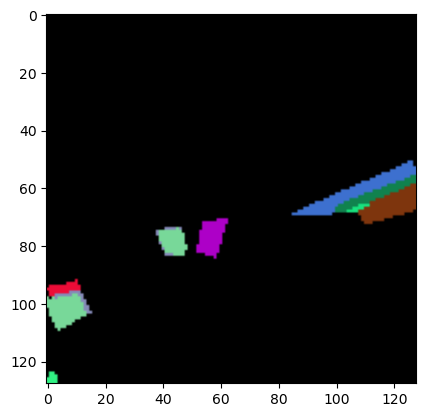

In [112]:
idx = 41
dfx = df.iloc[idx]
data_in_dfx = gpd.read_file(img_out_path + str(idx) + ".geojson")
# img = cv2.imread(img_out_path + str(idx) + ".png")
#draw boundaries
draw_instance( data_in_dfx, dfx, idx)

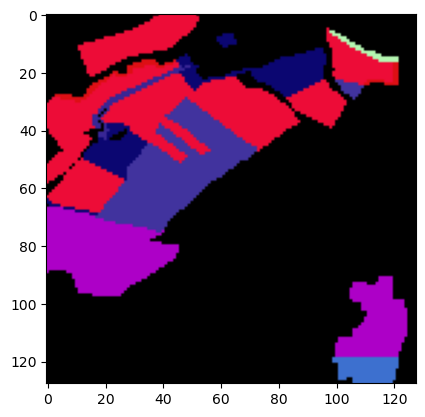

In [114]:

for i in range(len(df)):
    dfx = df.iloc[i]
    data_in_dfx = gpd.read_file(img_out_path + str(i) + ".geojson")
    # img = cv2.imread(img_out_path + str(i) + ".png")
    # plt.imshow(img)
    draw_instance( data_in_dfx, dfx, i)
    # break

In [115]:
import os

def update_file_names(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".npy") and filename != "parcel_data.geojson":
            if os.path.isfile(os.path.join(directory, filename)):
                new_filename = "INSTANCES_" + filename
                os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
            # print(f"Updated file name: {filename} --> {new_filename}")

# Provide the directory path where you want to update the file names
directory_path = "france/m_data/INSTANCE_ANNOTATIONS"

# Call the function to update the file names
update_file_names(directory_path)

In [94]:
instance_annotations = np.load(img_out_path +"instance_annotations/765.npy")
instance_annotations.shape

(128, 128)

In [159]:
# Convert to colored image
instance_annotations_image = cv2.cvtColor(instance_annotations, cv2.COLOR_RGB2GRAY)

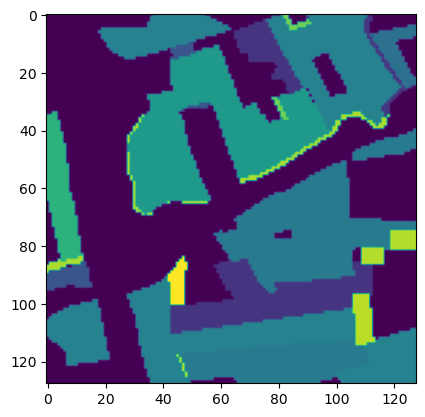

In [160]:
plt.imshow(instance_annotations_image)

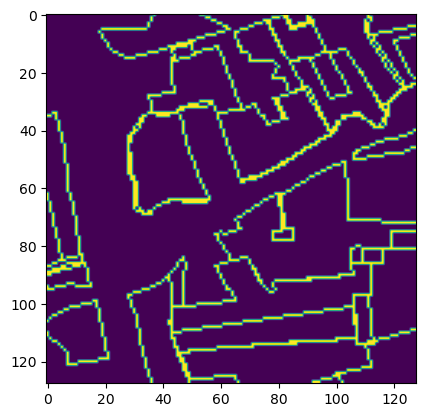

In [162]:
instance_annotations_image = cv2.cvtColor(instance_annotations, cv2.COLOR_RGB2GRAY)
plt.imshow(instance_annotations_image)

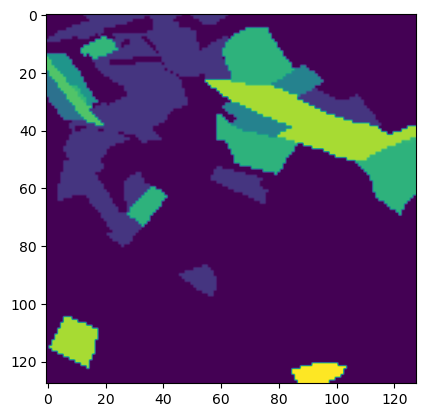

In [168]:
plt.imshow(instance_annotations)

In [97]:
instance_annotations = np.load(img_out_path +"instance_annotations/41.npy")
instance_annotations.shape

(128, 128)

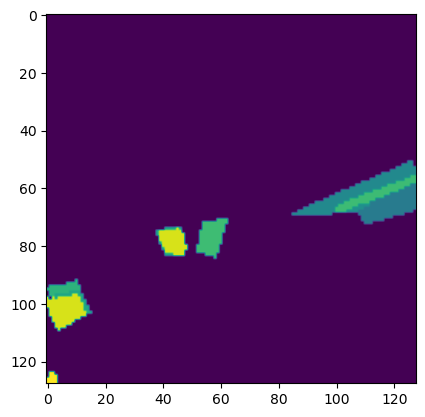

In [98]:
plt.imshow(instance_annotations)